# IC 4.10 Part 1_Data Privacy and Low-Activity User Exclusion

# Table of Contents
##### 1. Import Libraries and Data
##### 2. Security Implications
    2.1 Modify 'Income' to 'Income Group'
    2.2 Modify 'Age' to 'Age Group'
##### 3. Customer Behavior in Different Geographic Regions
    3.1 Create 'region' column
    3.2 Determine whether there’s a difference in spending habits between the different U.S. regions
        3.2.1 Low spenders vs High spenders by Region
##### 4. Exclusion Flag for Low-Activity customers
##### 5. Export Data


## Step 1: Import Libraries

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy

In [4]:
# Create path
path = r'C:\Users\ashle\Documents\07-2024 Instacart Basket Analysis'

# Import data
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## Step 2: Security Implications

In [6]:
# Display all columns
pd.set_option('display.max_columns', None)

ords_prods_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_purchase_price,spending_flag,median_days,order_frequency_flag,Gender,STATE,Age,date_joined,number_of_dependents,family_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both


There is no explicit Personally Identifiable Information (PII) such as names, email addresses, or phone numbers.  

Additional security and and privacy considerations to keep in mind: 

1. Risk of Re-identification: 
Even though individual descriptors like age, gender, state, marital status, and number of dependents may not individually identify an individual, combinations of these descriptors could potentially lead to re-identification when combined with external data sources.
2. Contextual Data Sensitivity:
Certain purchase behaviors might reveal sensitive personal preferences or habits.

Recommendations: 
Aggregate 'age' and 'income' to reduce the level of granularity: 
1. Create age_group column (Young Adult, Adult, Older Adult, Senior) and then drop the 'age' column
2. Create income_group column (Low income, Middle income, High income) and then drop the 'income' column

#### 2.1 Modify'Income' to 'Income Group

In [9]:
## Conditions:
# If income less than 50,000 then 'Low income'
# If income greater than or equal to 50,000 and less than 100,000 then 'Middle income'
# If income greater than or equal to 100,000 then 'High income'


# Create a result list for income column showing low income, middle income, or high income. 
result = []

for income in ords_prods_all['income']:
    if income < 50000:
        result.append('Low income')
    elif income >= 50000 and income < 100000:
        result.append('Middle income')
    elif income >= 100000:
        result.append('High income')
    else: 
        result.append('Other')

# Add a column 'income_group' and assign the result list
ords_prods_all['income_group'] = result

ords_prods_all['income_group'].value_counts()

income_group
High income      14814766
Middle income    13996010
Low income        3594083
Name: count, dtype: int64

#### 2.2 Modify 'Age' to 'Age Group'

In [11]:
## Conditions:
# If age less than 25 then young adult. (0-24)
# If age greater than or equal to 25 & less than 45 then adult. (25-44)
# If age greater than or equal to 45 & less than 65 then Older adult. (45-64)
# If age greater than or equal to 65 then senior. (65+)


# Create a result list for Age column showing Young adult, Adult, Older Adult, or Senior
result = []

for age in ords_prods_all['Age']:
    if age < 25:
        result.append('Young adult')
    elif age >= 25 and age < 45:
        result.append('Adult')
    elif age >= 45 and age < 65:
        result.append('Older adult')
    elif age >= 65:
        result.append('Senior')
    else: 
        result.append('Other')

# Add a column 'age_group' and assign the result list
ords_prods_all['age_group'] = result

ords_prods_all['age_group'].value_counts()

age_group
Older adult    10139691
Adult          10117083
Senior          8575084
Young adult     3573001
Name: count, dtype: int64

In [12]:
# Drop 'Age' and 'income' columns and assign to new dataframe ords_prods_all_secured
# Drop unnecessary '_merge' flag

ords_prods_all_secured = ords_prods_all.drop(columns=['Age', 'income', '_merge'])

In [13]:
ords_prods_all_secured.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_purchase_price,spending_flag,median_days,order_frequency_flag,Gender,STATE,date_joined,number_of_dependents,family_status,income_group,age_group
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,2019-02-17,3,married,Low income,Adult
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,2019-02-17,3,married,Low income,Adult
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,2019-02-17,3,married,Low income,Adult
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,2019-02-17,3,married,Low income,Adult
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regular days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,2019-02-17,3,married,Low income,Adult


Security concerns addressed. Age and income identifers were converted to ranges to reduce the level of granularity. 

## Step 3: Customer Behavior in Different Geographic Regions

#### 3.1 Create 'region' column

In [17]:
# Define regions
northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
southern_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'] 
western_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska','Washington', 'Oregon', 'California', 'Hawaii']

# Create a result list for the 'STATE' column  showing its corresponding region
result = []

for value in ords_prods_all_secured['STATE']: 
    if value in northeast_states:
        result.append('Northeast')
    elif value in midwest_states:
        result.append('Midwest')
    elif value in southern_states:
        result.append('South')
    elif value in western_states:
        result.append('West')
    else:
       result.append('No region assigned') 

In [18]:
# Create new column and assign result list to it
ords_prods_all_secured['region'] = result

In [19]:
# Confirm regions were assigned properly and check frequency
ords_prods_all_secured['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [20]:
ords_prods_all_secured['region'].head(100)

0     South
1     South
2     South
3     South
4     South
      ...  
95     West
96     West
97     West
98     West
99     West
Name: region, Length: 100, dtype: object

#### 3.2 Determine whether there’s a difference in spending habits between the different U.S. regions.

##### 3.2.1 Low spenders vs High spenders by Region

In [23]:
# Create the crosstab
region_spending_crosstab = pd.crosstab(ords_prods_all_secured['region'], ords_prods_all_secured['spending_flag'], normalize='index')

In [24]:
# Print the crosstab to verify
print(region_spending_crosstab)

spending_flag  High spender  Low spender
region                                  
Midwest            0.020530     0.979470
Northeast          0.018911     0.981089
South              0.019430     0.980570
West               0.019336     0.980664


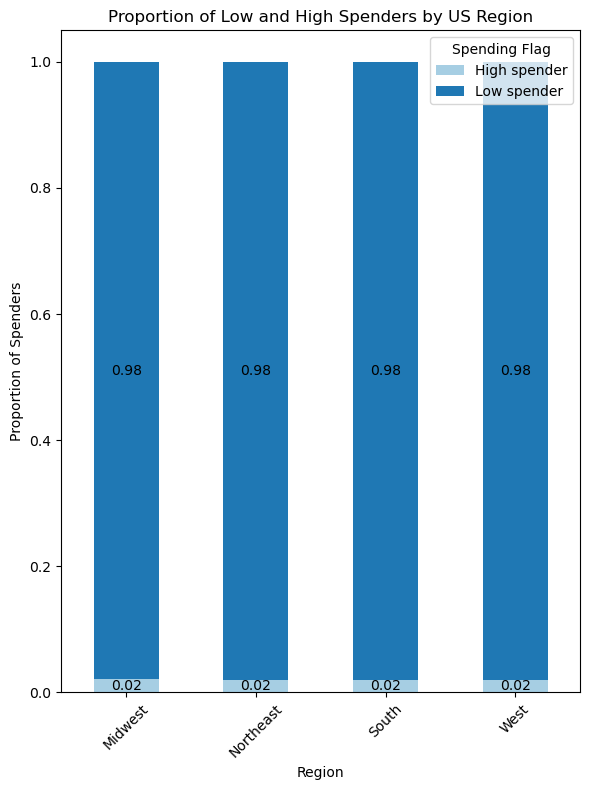

In [25]:
# Create stacked bar chart to show the proportions of high and low spenders in each region

# Define color palette
colors = sns.color_palette('Paired', n_colors=2)

spending_by_region = region_spending_crosstab.plot(kind='bar', stacked=True, figsize=(6,8), color=colors)
plt.xlabel('Region')
plt.ylabel('Proportion of Spenders')
plt.title('Proportion of Low and High Spenders by US Region')
plt.legend(title='Spending Flag')
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to fit labels

# Add data labels
for container in spending_by_region.containers:
    spending_by_region.bar_label(container, label_type='center', fmt='%.2f')

# Assign the current figure to a variable
spending_by_region = plt.gcf()

In [26]:
# Export chart
spending_by_region.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_by_region.png'), dpi=300, bbox_inches='tight')

## Step 4: Exclusion flag for low-activity customers (customers with less than 5 orders)

In [28]:
# Create exclusion flag for customers with less than 5 orders
result = []

for value in ords_prods_all_secured['max_order']:
    if value <5:
        result.append('Low-activity customer')
    else: 
        result.append('High-activity customer')

In [29]:
ords_prods_all_secured['activity_level'] = result

In [30]:
ords_prods_all_secured['activity_level'].value_counts()

activity_level
High-activity customer    30964564
Low-activity customer      1440295
Name: count, dtype: int64

In [31]:
# Check count of 'user_id' without exclusion
ords_prods_all_secured.nunique()

order_id                  3214685
user_id                    206209
order_number                   99
order_day_of_week               7
order_hour_of_day              24
days_since_prior_order         31
first_order                     2
product_id                  49659
add_to_cart_order             145
reordered                       2
product_name                49661
aisle_id                      134
department_id                  21
prices                        240
price_label                     3
busiest_day                     3
busiest_days                    3
busiest_period_of_day           3
max_order                      99
loyalty_flag                    3
avg_purchase_price         128800
spending_flag                   2
median_days                    61
order_frequency_flag            3
Gender                          2
STATE                          51
date_joined                  1187
number_of_dependents            4
family_status                   4
income_group  

In [32]:
# Create a new dataframe 'df_secured_with_exclusion' that excludes all rows where 'activity_level' is 'Low-activity customer'
df_secured_with_exclusion = ords_prods_all_secured[ords_prods_all_secured['activity_level'] != 'Low-activity customer']

In [33]:
# Check shape of new dataframe
df_secured_with_exclusion.shape

(30964564, 33)

In [34]:
# Check count of 'user_id' with exclusion
df_secured_with_exclusion.nunique()

order_id                  3064375
user_id                    162631
order_number                   99
order_day_of_week               7
order_hour_of_day              24
days_since_prior_order         31
first_order                     2
product_id                  49628
add_to_cart_order             145
reordered                       2
product_name                49630
aisle_id                      134
department_id                  21
prices                        240
price_label                     3
busiest_day                     3
busiest_days                    3
busiest_period_of_day           3
max_order                      95
loyalty_flag                    3
avg_purchase_price         120378
spending_flag                   2
median_days                    61
order_frequency_flag            3
Gender                          2
STATE                          51
date_joined                  1187
number_of_dependents            4
family_status                   4
income_group  

## 5. Export Data

In [36]:
# Export data
df_secured_with_exclusion.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'secured_with_exclusion.pkl'))